In [38]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np

In [39]:
img_car1 = pil.Image.open("../Image/car_no_light_1280x720.jpg")

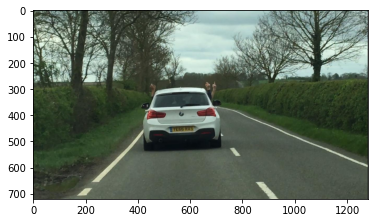

In [40]:
plt.imshow(img_car1)

In [41]:
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

In [42]:
myraw = img2array(img_car1)

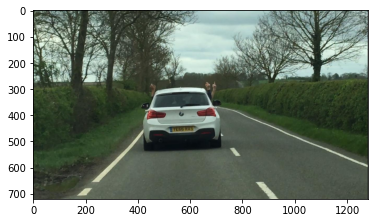

In [43]:
myimg = pil.Image.fromarray(myraw)
plt.imshow(myimg)

In [44]:
myscale = np.divide(myraw, 255.0)

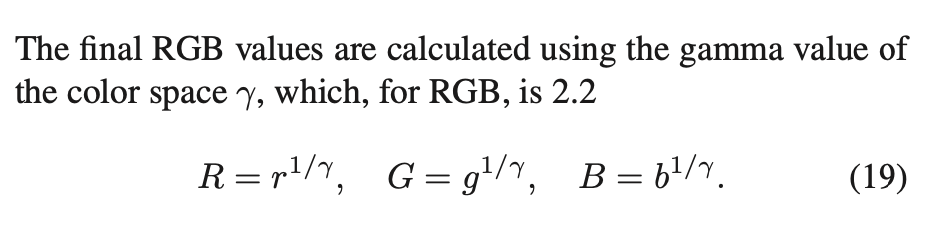

In [45]:
myrgb = np.power(myscale,2.2)

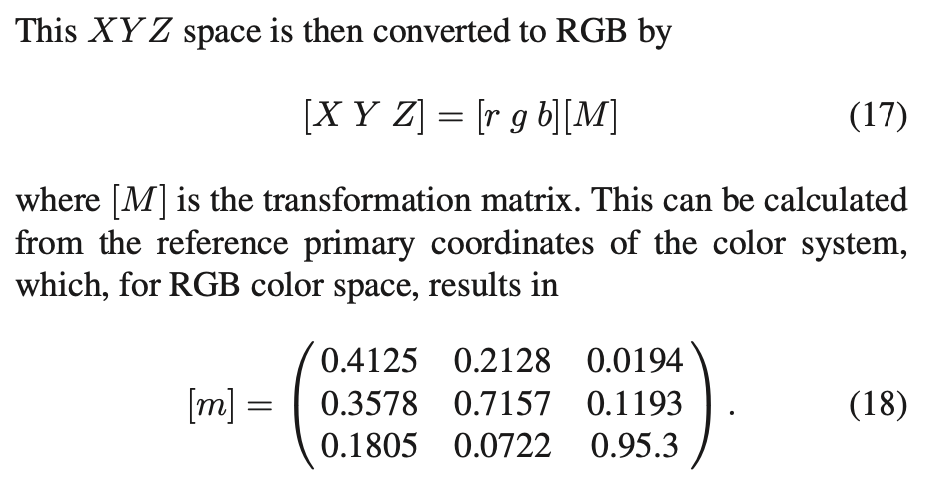

In [46]:
myrgb[0,0]

array([0.38377465, 0.42590529, 0.35865391])

In [47]:
m = [[0.4125, 0.2128, 0.0194],
     [0.3578, 0.7157, 0.1193],
     [0.1805, 0.0722, 0.9503]]

In [48]:
myshape = np.shape(myrgb)
print(myshape)

(720, 1280, 3)


In [49]:
myXYZ = np.zeros([myshape[0], myshape[1], myshape[2]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myXYZ[i,j] = np.matmul(myrgb[i,j], m)

In [50]:
myxyz = np.zeros([myshape[0], myshape[1], myshape[2]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        mysum = myXYZ[i,j,0] + myXYZ[i,j,1] + myXYZ[i,j,2]
        myxyz[i,j,0] = myXYZ[i,j,0]/mysum
        myxyz[i,j,1] = myXYZ[i,j,1]/mysum
        myxyz[i,j,2] = myXYZ[i,j,2]/mysum

In [51]:
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]

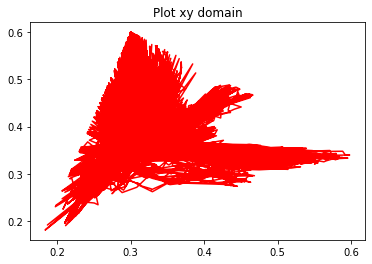

In [52]:
plt.title("Plot xy domain")
plt.plot(myx, myy, color='red')

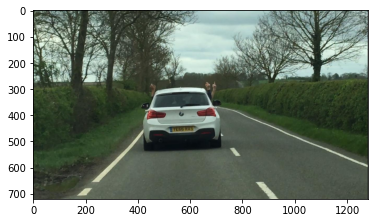

In [53]:
myimg = pil.Image.fromarray(myraw)
plt.imshow(myimg)

In [54]:
myimg_map = myimg.load()

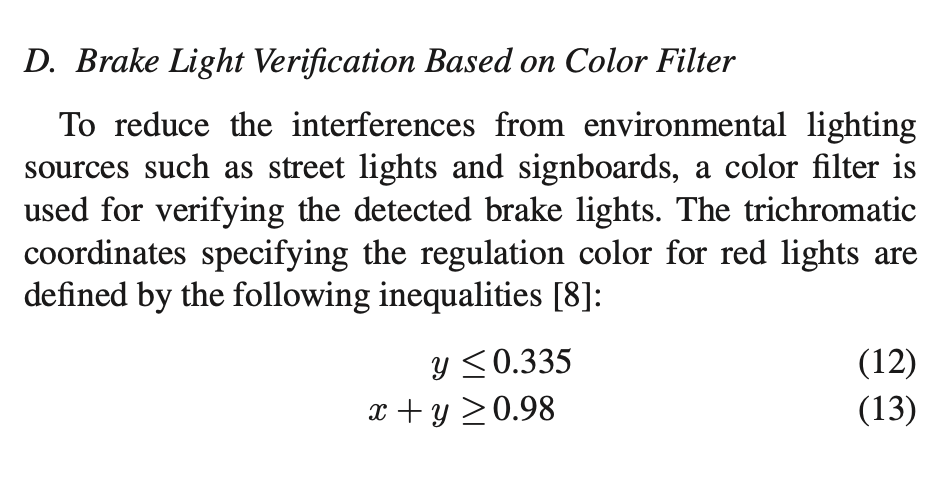
        

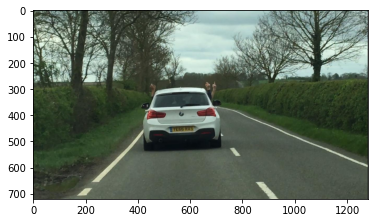

In [96]:
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)
        

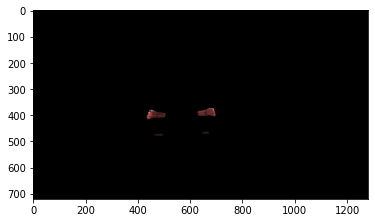

In [97]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (0,0,0)
plt.imshow(myimg)

In [98]:
x = np.linspace(0, 1, 100)
y = 0.7 - x
y1 = np.ones([100])*0.35

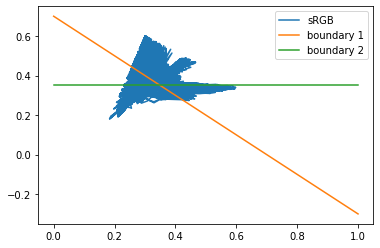

In [99]:
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

In [100]:
def RGB2xyz(img):
    myraw = img2array(img)
    myscale = np.divide(myraw, 255.0)
    myrgb = np.power(myscale,2.2)
    myshape = np.shape(myrgb)
    m = [[0.4125, 0.2128, 0.0194],
         [0.3578, 0.7157, 0.1193],
         [0.1805, 0.0722, 0.9503]]
    myXYZ = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            myXYZ[i,j] = np.matmul(myrgb[i,j], m)
    myxyz = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            mysum = myXYZ[i,j,0] + myXYZ[i,j,1] + myXYZ[i,j,2]
            myxyz[i,j,0] = myXYZ[i,j,0]/mysum
            myxyz[i,j,1] = myXYZ[i,j,1]/mysum
            myxyz[i,j,2] = myXYZ[i,j,2]/mysum
    return myxyz

In [101]:
myxyz = RGB2xyz(img_car1)

In [102]:
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]

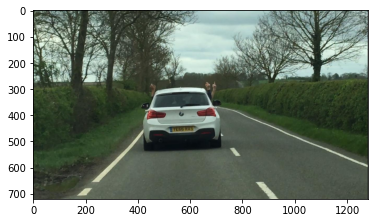

In [103]:
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

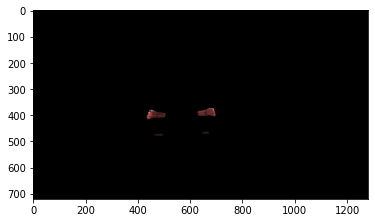

In [104]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (0,0,0)
plt.imshow(myimg)

In [105]:
img_car2 = pil.Image.open("../Image/car_with_brake_light_1280x720.jpg")

In [106]:
myraw = img2array(img_car2)

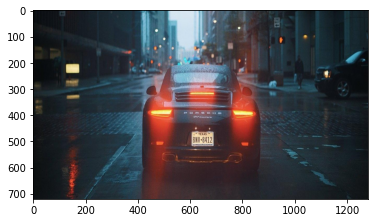

In [107]:
myimg = pil.Image.fromarray(myraw)
plt.imshow(myimg)

In [108]:
myxyz = RGB2xyz(img_car2)

In [109]:
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]

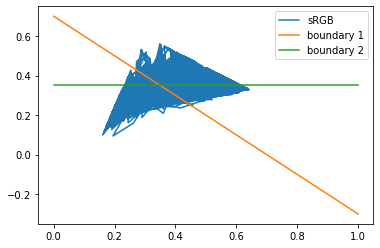

In [110]:
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

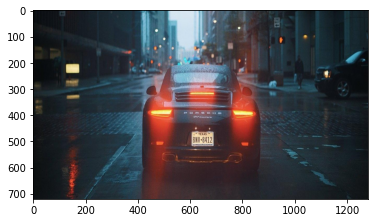

In [115]:
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

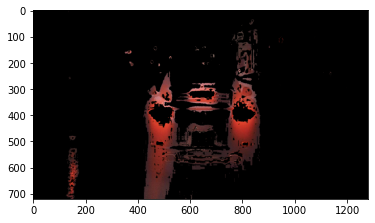

In [117]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (0,0,0)
plt.imshow(myimg)

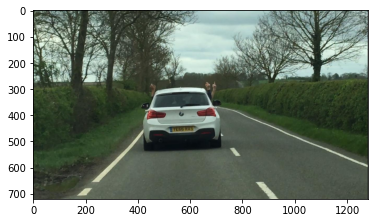

In [124]:
img_car1 = pil.Image.open("../Image/car_no_light_1280x720.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

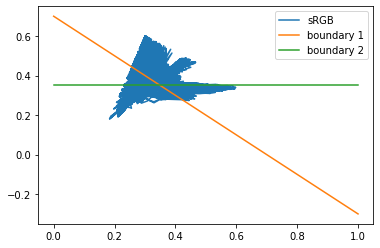

In [125]:
myxyz = RGB2xyz(img_car1)
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

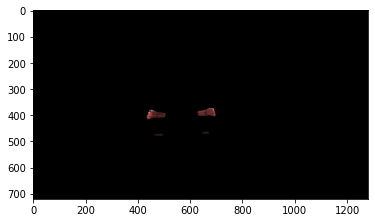

In [126]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (0,0,0)
plt.imshow(myimg)